<a href="https://colab.research.google.com/github/keedjk7/Machine-Learning/blob/main/Activity4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Data Exploration

In [ ]:
df_raw = pd.read_csv("CarPrice.csv")

In [ ]:
df_raw.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df_raw.shape

(205, 26)

In [ ]:
df_raw.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
175,176,-1,toyota corona,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
12,13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0
121,122,1,plymouth satellite custom (sw),gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
151,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
180,181,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,...,171,mpfi,3.27,3.35,9.2,156,5200,20,24,15690.0
60,61,0,mazda glc custom l,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8495.0


In [ ]:
df_raw.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df = df_raw.drop(labels = ['car_ID','CarName'], axis = 1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

## Data Transform and Selection

In [ ]:
scaler = StandardScaler()
dfForScaler = df.select_dtypes(exclude=['object'])
dfForEncode = df.select_dtypes(include=['object'])
# dfForEncode = df.loc[:,(df.dtypes=='object').values]
dfScaler = scaler.fit_transform(dfForScaler)

dfScaler

array([[ 1.74347043, -1.6907718 , -0.42652147, ..., -0.64655303,
        -0.54605874,  0.02739114],
       [ 1.74347043, -1.6907718 , -0.42652147, ..., -0.64655303,
        -0.54605874,  0.4044611 ],
       [ 0.133509  , -0.70859588, -0.23151305, ..., -0.95301169,
        -0.69162706,  0.4044611 ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ..., -1.10624102,
        -1.12833203,  1.02998314],
       [-1.47645244,  1.72187336,  1.19854871, ...,  0.11959362,
        -0.54605874,  1.15358178],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.95301169,
        -0.83719538,  1.17303131]])

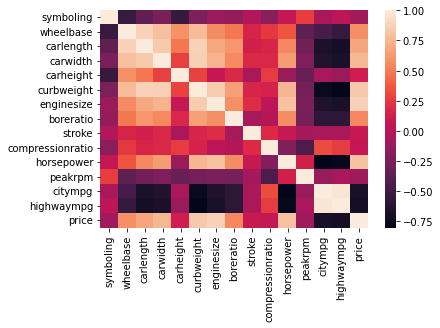

In [ ]:
dataCorr = dfForScaler.corr()
sns.heatmap(dataCorr)

In [ ]:
lower = pd.DataFrame(np.tril(dataCorr,-1), columns = dataCorr.columns)
lower

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.531954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.357612,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.232919,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.541038,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-0.227691,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
to_drop = [column for column in lower if any(lower[column] > 0.86)]
dfForScaler.drop(to_drop, inplace=True, axis=1)
dfAfterSelection = dfForScaler.drop(labels=['price'],axis=1)
dfAfterSelection
# dfForScaler.drop(to_drop, inplace=True, axis=1)
# dfForScaler

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,3,48.8,2548,3.47,2.68,9.0,111,5000,27
1,3,48.8,2548,3.47,2.68,9.0,111,5000,27
2,1,52.4,2823,2.68,3.47,9.0,154,5000,26
3,2,54.3,2337,3.19,3.40,10.0,102,5500,30
4,2,54.3,2824,3.19,3.40,8.0,115,5500,22
...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,3.78,3.15,9.5,114,5400,28
201,-1,55.5,3049,3.78,3.15,8.7,160,5300,25
202,-1,55.5,3012,3.58,2.87,8.8,134,5500,23
203,-1,55.5,3217,3.01,3.40,23.0,106,4800,27


In [ ]:
dfForEncode.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [ ]:
dfGetEncode =pd.get_dummies(dfForEncode, columns = dfForEncode.columns, drop_first=True)
dfGetEncode

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## PCA 

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(dfScaler)
X_pca

array([[-8.00708250e-01, -2.64671817e+00, -1.01644319e-01, ...,
         3.01870301e-01,  1.93545440e-01,  3.17513018e-03],
       [-6.80901156e-01, -2.68273865e+00, -1.49995373e-01, ...,
         2.11922074e-01,  2.25927963e-01,  2.40472645e-02],
       [ 3.74819393e-01, -1.30286357e+00, -9.34952601e-01, ...,
        -3.04916502e-01,  2.41284305e-02, -1.27800094e-01],
       ...,
       [ 3.57665217e+00,  1.95286257e-01,  1.88293767e+00, ...,
         2.50578739e-01, -3.45729819e-01, -1.33809908e-01],
       [ 2.50818558e+00,  3.12640685e+00, -1.29519335e+00, ...,
        -1.60535309e-01, -5.83845242e-02,  2.48687491e-01],
       [ 3.38807000e+00,  6.92259119e-01,  1.40229575e+00, ...,
        -2.74881271e-02,  1.10067692e-01, -1.69631267e-01]])

In [ ]:
dfScaler.shape

(205, 15)

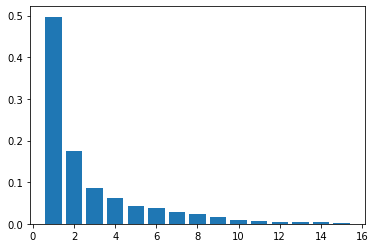

In [ ]:
plt.bar(range(1,16),pca.explained_variance_ratio_)
plt.show()

In [ ]:
print('Explained Variance ratio = ', pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca.components_[0:2,:])

Explained Variance ratio =  [0.49737394 0.17573473 0.08527536 0.06301976 0.0418972  0.03684286
 0.02829451 0.02267827 0.0174146  0.00894471 0.00778045 0.00530398
 0.00480471 0.00336544 0.00126947]
Explained Variance (eigenvalues) =  [7.49718071 2.64894268 1.28540066 0.94993025 0.63153865 0.5553519
 0.42649817 0.3418416  0.26249948 0.13482831 0.11727889 0.0799497
 0.07242397 0.05072905 0.01913538]
--------------------------------------------
PCA components (eigenvectors) 
[[-0.09131161  0.29215047  0.330765    0.32700956  0.112739    0.35409154
   0.31813193  0.2617828   0.05233245  0.01882323  0.2906172  -0.08079524
  -0.30042173 -0.3112147   0.31773174]
 [-0.39512189  0.28696477  0.15076723  0.07051924  0.42344769  0.03161237
  -0.075211   -0.02238866  0.06183457  0.41258307 -0.29673464 -0.39573518
   0.26931223  0.21679561 -0.0955273 ]]


In [ ]:
pca1 = PCA(n_components=2)
X_pca1 = pca1.fit_transform(dfScaler)
print('Explained Variance ratio = ', pca1.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca1.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca1.components_[0:2,:])

Explained Variance ratio =  [0.49737394 0.17573473]
Explained Variance (eigenvalues) =  [7.49718071 2.64894268]
--------------------------------------------
PCA components (eigenvectors) 
[[-0.09131161  0.29215047  0.330765    0.32700956  0.112739    0.35409154
   0.31813193  0.2617828   0.05233245  0.01882323  0.2906172  -0.08079524
  -0.30042173 -0.3112147   0.31773174]
 [-0.39512189  0.28696477  0.15076723  0.07051924  0.42344769  0.03161237
  -0.075211   -0.02238866  0.06183457  0.41258307 -0.29673464 -0.39573518
   0.26931223  0.21679561 -0.0955273 ]]


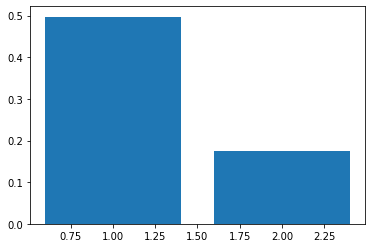

In [ ]:
plt.bar(range(1,3), pca1.explained_variance_ratio_)
plt.show()

In [ ]:
pca2 = PCA(n_components=3)
X_pca2 = pca2.fit_transform(dfScaler)
print('Explained Variance ratio = ', pca2.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca2.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca2.components_[0:2,:])

Explained Variance ratio =  [0.49737394 0.17573473 0.08527536]
Explained Variance (eigenvalues) =  [7.49718071 2.64894268 1.28540066]
--------------------------------------------
PCA components (eigenvectors) 
[[-0.09131161  0.29215047  0.330765    0.32700956  0.112739    0.35409154
   0.31813193  0.2617828   0.05233245  0.01882323  0.2906172  -0.08079524
  -0.30042173 -0.3112147   0.31773174]
 [-0.39512189  0.28696477  0.15076723  0.07051924  0.42344769  0.03161237
  -0.075211   -0.02238866  0.06183457  0.41258307 -0.29673464 -0.39573518
   0.26931223  0.21679561 -0.0955273 ]]


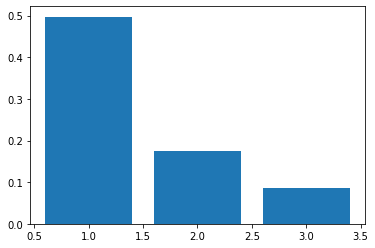

In [ ]:
plt.bar(range(1,4), pca2.explained_variance_ratio_)
plt.show()

In [ ]:
pca3 = PCA(n_components=4)
X_pca3 = pca3.fit_transform(dfScaler)
print('Explained Variance ratio = ', pca3.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca3.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca3.components_[0:2,:])

Explained Variance ratio =  [0.49737394 0.17573473 0.08527536 0.06301976]
Explained Variance (eigenvalues) =  [7.49718071 2.64894268 1.28540066 0.94993025]
--------------------------------------------
PCA components (eigenvectors) 
[[-0.09131161  0.29215047  0.330765    0.32700956  0.112739    0.35409154
   0.31813193  0.2617828   0.05233245  0.01882323  0.2906172  -0.08079524
  -0.30042173 -0.3112147   0.31773174]
 [-0.39512189  0.28696477  0.15076723  0.07051924  0.42344769  0.03161237
  -0.075211   -0.02238866  0.06183457  0.41258307 -0.29673464 -0.39573518
   0.26931223  0.21679561 -0.0955273 ]]


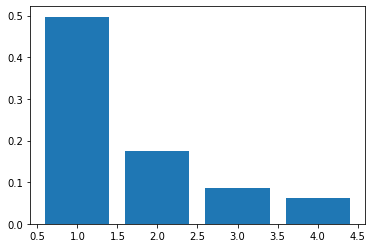

In [ ]:
plt.bar(range(1,5), pca3.explained_variance_ratio_)
plt.show()

## Linear Regression

In [ ]:
dfAfterSelection

,symboling,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,3,48.8,2548,3.47,2.68,9.0,111,5000,27
1,3,48.8,2548,3.47,2.68,9.0,111,5000,27
2,1,52.4,2823,2.68,3.47,9.0,154,5000,26
3,2,54.3,2337,3.19,3.40,10.0,102,5500,30
4,2,54.3,2824,3.19,3.40,8.0,115,5500,22
...,...,...,...,...,...,...,...,...,...
200,-1,55.5,2952,3.78,3.15,9.5,114,5400,28
201,-1,55.5,3049,3.78,3.15,8.7,160,5300,25
202,-1,55.5,3012,3.58,2.87,8.8,134,5500,23
203,-1,55.5,3217,3.01,3.40,23.0,106,4800,27


In [ ]:
X = dfAfterSelection
# Y = df['symboling']
Y = df['price']

In [ ]:
Rseed = 777
x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)

In [ ]:
lr = LinearRegression()
# Train
lr.fit(x_train, y_train)
# Validate
y_pred_lr = lr.predict(x_validate)
# Test
y_test_pred_lr = lr.predict(x_test)

In [ ]:
# Measure Accuracy Validation and Test
r2_score(y_pred_lr, y_validate)

0.7905635513597066

In [ ]:
r2_score(y_test_pred_lr, y_test)

0.8045794301389486

In [ ]:
lr.score(x_validate, y_validate)

0.8111913791726231

In [ ]:
lr.score(x_test, y_test)

0.7258220700049811

## Bar

In [ ]:
x_n_component = [2,3,4,5,6,7]
for i in range(6):
  Pca = PCA(n_components= i+2)
  X_Pca = Pca.fit_transform(dfAfterSelection)
  x_n_component[i] = X_Pca

r2accvalid = [0,2,3,4,5,6,7]
r2accvalid[0] = r2_score(y_pred_lr, y_validate)
r2acctest = [0,2,3,4,5,6,7]
r2acctest[0] = r2_score(y_test_pred_lr, y_test)

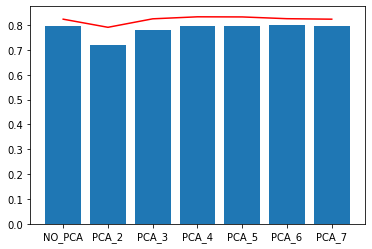

In [ ]:
for i in range (6):
    x_train_set, x_test, y_train_set, y_test = train_test_split(x_n_component[i], Y, test_size = 0.3, random_state = Rseed )
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)

    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    r2accvalid[i+1] = r2_score(y_pred_lr, y_validate)
    r2acctest[i+1] = r2_score(y_test_pred_lr, y_test)
plt.bar(["NO_PCA","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7"],r2accvalid)
plt.plot(r2acctest,color= 'r')
plt.show()

In [ ]:
msevalid = [0,5,10,15,20,25,30]
msevalid[0] = mean_squared_error(y_pred_lr, y_validate)
msetest = [0,5,10,15,20,25,30]
msetest[0] = mean_squared_error(y_test_pred_lr, y_test)

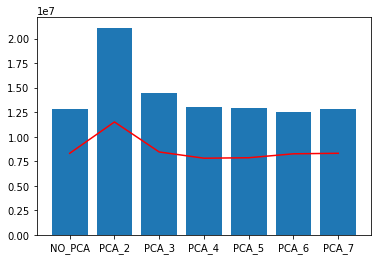

In [ ]:
for i in range (6):
    x_train_set, x_test, y_train_set, y_test = train_test_split(x_n_component[i], Y, test_size = 0.3, random_state = Rseed )
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)

    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    msevalid[i+1] = mean_squared_error(y_pred_lr, y_validate)
    msetest[i+1] = mean_squared_error(y_test_pred_lr, y_test)
plt.bar(["NO_PCA","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7"],msevalid)
plt.plot(msetest,color= 'r')
plt.show()